In [3]:
%pylab inline
%time
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplt
import seaborn as sns

import theano.tensor as tt
from theano import as_op

import pymc3 as pm
from sklearn.model_selection import KFold

from scipy.stats import norm



Populating the interactive namespace from numpy and matplotlib
Wall time: 0 ns


In [4]:

%time
trainDF = pd.read_csv("train.csv")
testDF = pd.read_csv("test.csv")
sampleSubmissionDF = pd.read_csv("sample_submission.csv")

%time
all_data = pd.concat((trainDF.loc[:,'MSSubClass':'SaleCondition'],
                      testDF.loc[:,'MSSubClass':'SaleCondition']))


Wall time: 0 ns
Wall time: 0 ns


In [5]:
from sklearn.linear_model import LinearRegression
all_data.loc[all_data.PoolQC.isnull(), 'PoolQC']='NA'


# In[212]:

all_data = all_data.replace({'PoolQC': {'Ex': 4,
                                            'Gd': 3,
                                            'TA': 2,
                                            'Fa': 1,
                                           'NA':0
                                            }
        })


# ### Alley

# In[213]:

all_data.loc[all_data.Alley.isnull(), 'Alley']='NA'


# ### Fence

# In[214]:

all_data.loc[all_data.Fence.isnull(), 'Fence']='NA'


# In[215]:

all_data = all_data.replace({'Fence': {'GdPrv': 4,
                                            'MnPrv': 3,
                                            'GdWo': 2,
                                            'MnWw': 1,
                                           'NA':0
                                            }
        })


# ### FirePlaceQu

# In[216]:

all_data.loc[all_data.FireplaceQu.isnull(), 'FireplaceQu']='NA'


# In[217]:

all_data = all_data.replace({'FireplaceQu': {'Ex': 5,
                                            'Gd': 4,
                                            'TA': 3,
                                            'Fa': 2,
                                            'Po': 1,
                                           'NA':0
                                            }
        })


# ### Utilities

# In[218]:

all_data.loc[all_data.Utilities.isnull(), 'Utilities']='AllPub'


# ### Kitchen Qualitty

# In[221]:

all_data.loc[all_data.KitchenQual.isnull(), 'KitchenQual']='TA'


# In[222]:

all_data = all_data.replace({ 'KitchenQual': {'Ex': 5,
                                            'Gd': 4,
                                            'TA': 3,
                                            'Fa': 2,
                                            'Po': 1
                                            }
        })


# ### SaleType

# In[223]:

all_data.loc[all_data.SaleType.isnull(), 'SaleType']='WD'


# ### MasVnrArea

# In[224]:

all_data.loc[all_data.MasVnrArea.isnull(), 'MasVnrArea']=0


# ### MasVnrType

# In[225]:

all_data.loc[all_data.MasVnrType.isnull(), 'MasVnrType']='None'


# ### Basement

# In[226]:

for c in ['TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtHalfBath', 'BsmtFullBath']:
    all_data.loc[all_data[c].isnull(), c]=0


# In[227]:

indexes = all_data['BsmtFinType1'].isnull()
for c in ['BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtExposure']:
    all_data.loc[indexes, c]='NA'


# In[228]:

indexes = all_data['BsmtFinType1'].isnull()
for c in ['BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtExposure']:
    all_data.loc[indexes, c]='NA'
#We filtered on BsmtFinType1 because it had least no of Nulls. Now there would 2 more Nulls in BsmtCond, need to check it further

all_data.loc[all_data.BsmtCond.isnull(), 'BsmtCond']='TA'
all_data = all_data.replace({ 'BsmtCond': {'Ex': 5,
                                            'Gd': 4,
                                            'TA': 3,
                                            'Fa': 2,
                                            'Po': 1,
                                           'NA':0
                                            }
        })


# In[231]:


all_data.loc[all_data.BsmtQual.isnull(), 'BsmtQual']='TA'
all_data = all_data.replace({ 'BsmtQual': {'Ex': 5,
                                            'Gd': 4,
                                            'TA': 3,
                                            'Fa': 2,
                                            'Po': 1,
                                           'NA':0
                                            }
        })



# In[234]:

all_data.loc[all_data.BsmtExposure.isnull(), 'BsmtExposure']='No'
all_data = all_data.replace({ 'BsmtExposure': {'Gd': 4,
                                            'Av': 3,
                                            'Mn': 2,
                                            'No': 1,
                                              'NA':0
                                            }
        })


# In[235]:

all_data.loc[all_data.BsmtFinType2.isnull(), 'BsmtFinType2']='Unf'
all_data = all_data.replace({ 'BsmtFinType2': {'GLQ': 6,
                                            'ALQ': 5,
                                            'BLQ': 4,
                                            'Rec': 3,
                                            'LwQ': 2,
                                              'Unf':1,
                                              'NA':0
                                            }
        })


# ### MSZoning

# In[237]:

all_data.loc[all_data.MSZoning.isnull(), 'MSZoning']='RL'


# ### Functional

# In[238]:

all_data.loc[all_data.Functional.isnull(), 'Functional']='Typ'
all_data = all_data.replace({ 'Functional': {'Typ': 7,
                                            'Min1': 6,
                                            'Min2': 5,
                                            'Mod': 4,
                                            'Maj1': 3,
                                              'Maj2':2,
                                              'Sev':1,
                                             'Sal':0
                                            }
        })


# In[239]:

all_data.loc[all_data.Electrical.isnull(), 'Electrical']='SBrkr'


# ### LotFrontage

# In[240]:

nullIndex = all_data.LotFrontage.isnull()


# In[241]:

nonNullIndex = all_data.LotFrontage.notnull()


# In[242]:

X_Train = np.sqrt(all_data.LotArea[nonNullIndex])


# In[243]:

Y_Train = all_data.LotFrontage[nonNullIndex]


# In[244]:

y= np.array(Y_Train)


# In[245]:

b=np.array(X_Train)
x = b.reshape(len(b),1)


# In[246]:

model = LinearRegression()


# In[247]:

model.fit(x, y)


# In[248]:

X_Test = np.sqrt(all_data.LotArea[nullIndex])
b=np.array(X_Test)
xt = b.reshape(len(b),1)
yPred = model.predict(xt)


# In[249]:

all_data.loc[nullIndex, 'LotFrontage']=yPred


# In[250]:

all_data.LotFrontage.isnull().sum()


# ### Garage

# In[251]:

garage = all_data[['GarageCond', 'GarageQual', 'GarageYrBlt', 'GarageFinish', 'GarageType', 'GarageCars', 'GarageArea']]


# In[252]:

garage.head()


# In[253]:

garage.GarageYrBlt.isnull().sum()


# In[254]:

garage[garage.GarageYrBlt.isnull()].head()


# So when garage year blt is null, we can say that there is no garage.
# Looking at the data description it seems that GarageType, GarageFinish, GarageQuality, GarageCondition has NA values signifying No Garrage. Replacing them.

# In[255]:

all_data.loc[all_data.GarageYrBlt.isnull(), 'GarageCond']='NA'


# In[256]:

all_data.loc[all_data.GarageYrBlt.isnull(), 'GarageFinish']='NA'


# In[257]:

all_data.loc[all_data.GarageYrBlt.isnull(), 'GarageQual']='NA'


# In[258]:

all_data.loc[all_data.GarageYrBlt.isnull(), 'GarageType']='NA'


# Now how to impute garage year built, when garage is not built. I think we should check the relation between Garage year build and sale price

# In[259]:

# In[260]:




# In[262]:

all_data.loc[all_data.GarageYrBlt.isnull(), 'GarageYrBlt']=0


# We clearly see that house that garage has more price. Now how to impute this value.

# In[263]:

garage = all_data[['GarageCond', 'GarageQual', 'GarageYrBlt', 'GarageFinish', 'GarageType', 'GarageCars', 'GarageArea']]


# In[264]:

garage[garage.GarageCars.isnull()]


# We will make them zero. We did not do it earlier because there were some cases when garageYrBlt was Null but Garage Cars where not null. Probably they refered to detached garage type. Lets have a look

# In[265]:

ind = garage.GarageYrBlt==0


# In[266]:

(garage.GarageCars[ind]!=0).sum()


# In[267]:

(garage.GarageArea[ind]!=0).sum()


# Okay so these are just two cases, we will make them all zero.

# In[268]:

all_data.loc[all_data.GarageCars.isnull(), ('GarageCars', 'GarageArea')]=0

all_data = pd.get_dummies(all_data)

In [6]:
all_data = (all_data - all_data.mean()) / all_data.std()

X_train = all_data[:trainDF.shape[0]]
X_test = all_data[trainDF.shape[0]:]
y = trainDF.SalePrice

y = log(y)
X = X_train.values

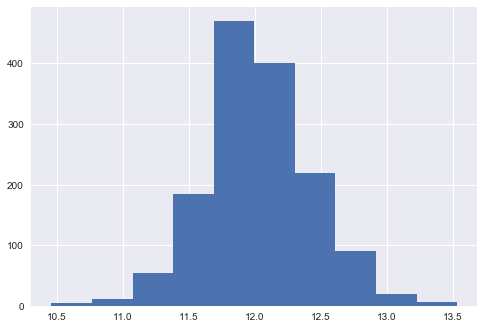

In [7]:
y.hist()

In [8]:
def direct_rmse_error(actual, predicted):
    ans = np.sqrt(np.sum(np.square(actual-predicted))/len(actual))
    return ans
def my_cv(model, x, y, n_splits):
    kf = KFold(n_splits=n_splits)
    kf.get_n_splits(X_train)
    ary = []
    for train_index, test_index in kf.split(x):    
        if type(x) is pd.core.frame.DataFrame:
            Xtr, Xte = x.ix[train_index, :], x.ix[test_index, :]
            Ytr, Yte = y[train_index], y[test_index]
        else:
            Xtr, Xte = x[train_index], x[test_index]
            Ytr, Yte = y[train_index], y[test_index]
        model.fit(Xtr, Ytr)
        Y_pred = model.predict(Xte)
        ary.append(direct_rmse_error(Yte, Y_pred))        
    return np.mean(ary)

# Point Estimates

## Lasso

In [141]:
with pm.Model() as reg_model:
    alpha = pm.Normal('alpha', mu = 10, sd = 3.0)
    beta = pm.Laplace('beta', mu = 0.0, b = 3, shape = X.shape[1])
    sigma = pm.HalfNormal('sigma', sd=1)
    ll = [beta[q]*X[:,q] for q in range(0, X.shape[1])]
    mu = alpha + sum(ll)
            
    y_obs = pm.Normal('y_obs', mu=mu, sd=sigma, observed=y)
    step = pm.Metropolis()
    trace = pm.sample(20000, step)

100%|██████████| 20000/20000 [02:11<00:00, 152.58it/s]


In [142]:
pm.summary(trace[4000:])


alpha:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  12.017           0.003            0.000            [12.011, 12.022]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  12.011         12.015         12.017         12.018         12.022


beta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -0.004           0.008            0.001            [-0.022, 0.008]
  0.011            0.004            0.000            [0.002, 0.018]
  0.012            0.003            0.000            [0.006, 0.017]
  0.063            0.006            0.001            [0.053, 0.077]
  0.037            0.004            0.000            [0.031, 0.045]
  0.020            0.012            0.001            [-0.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0712EDCC0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001E0A61348D0>]], dtype=object)

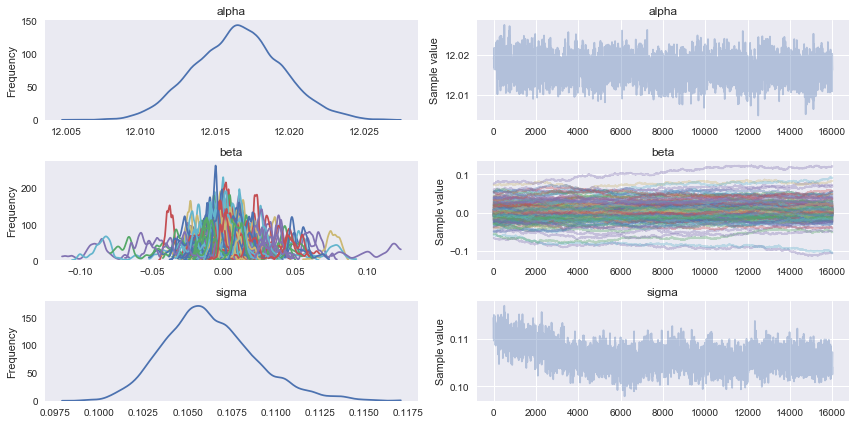

In [143]:
pm.traceplot(trace[4000:])

In [144]:
class LassoRegression:
    def __init__(self):
        self.parameter = [] # Regression Coefficient
        self.alpha = None # Intercept
    def fit(self, XX, YY):
        XX = XX.values
        YY = YY.values
        with pm.Model() as reg_model:
            alpha = pm.Normal('alpha', mu = 3, sd = 15.0)
            beta = pm.Laplace('beta', mu = 0.0, b = 10.0, shape = XX.shape[1])
            sigma = pm.HalfNormal('sigma', sd=10.0)
            ll = [beta[q]*XX[:,q] for q in range(0, XX.shape[1])]
            mu = alpha + sum(ll)

            y_obs = pm.Normal('y_obs', mu=mu, sd=sigma, observed=YY)
            step = pm.Metropolis()
            trace = pm.sample(20000, step)
        trace = trace[2500:]
        b=np.array(trace['beta'])
        betaDF = pd.DataFrame(data=b, columns = all_data.columns)
        alpha_parameter = trace[alpha].mean()
        self.alpha = alpha_parameter
        parameters = betaDF.mean().values
        self.parameter = parameters
    def predict(self, XX):
        XX = XX.values
        YY = XX.dot(self.parameter) + self.alpha
        return YY

In [145]:
cv_score = my_cv(LassoRegression(), X_train, y, 5)    
print ("rmse using Lasso Regression is = ", cv_score)

100%|██████████| 20000/20000 [01:29<00:00, 224.19it/s]


rmse using Lasso Regression is =  0.334810539273


## Ridge

In [146]:
with pm.Model() as reg_model:
    alpha = pm.Normal('alpha', mu = 12, sd = 3.0)
    beta = pm.Normal('beta', mu = 0.0, sd = 3.0, shape = X.shape[1])
    sigma = pm.HalfNormal('sigma', sd=1)
    ll = [beta[q]*X[:,q] for q in range(0, X.shape[1])]
    mu = alpha + sum(ll)
            
    y_obs = pm.Normal('y_obs', mu=mu, sd=sigma, observed=y)
    step = pm.Metropolis()
    trace = pm.sample(20000, step)

100%|██████████| 20000/20000 [02:26<00:00, 136.72it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DFBD0B4518>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001DFACAC2908>]], dtype=object)

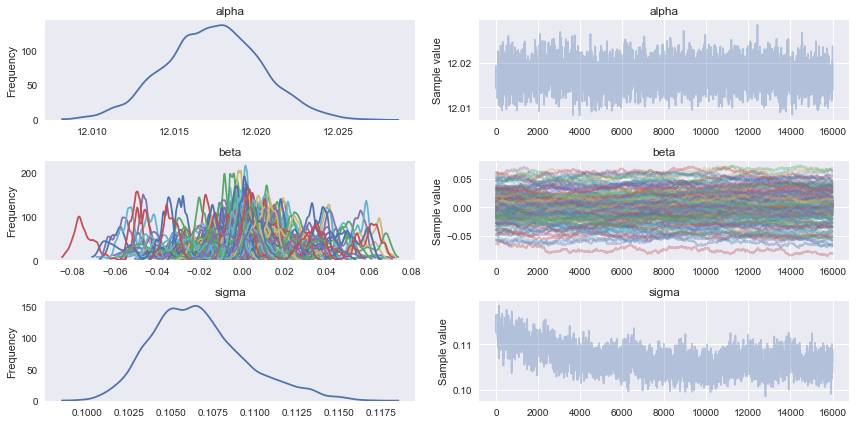

In [147]:
pm.traceplot(trace[4000:])

In [148]:
class BayesianNativeNormalRegression:
    def __init__(self):
        self.parameter = []
        self.alpha = None
        
    def fit(self, XX, YY):
        XX = XX.values
        YY = YY.values
        with pm.Model() as reg_model:
            alpha = pm.Normal('alpha', mu = 12.0, sd = 3.0)
            beta = pm.Normal('beta', mu = 0.0, sd = 3, shape = XX.shape[1])
            sigma = pm.HalfNormal('sigma', sd=1)
            ll = [beta[q]*XX[:,q] for q in range(0, XX.shape[1])]
            mu = alpha + sum(ll)
            y_obs = pm.Normal('y_obs', mu=mu, sd=sigma, observed=YY)
            step = pm.Metropolis()
            trace = pm.sample(20000, step)
        trace = trace[2500:]
        b=np.array(trace['beta'])
        betaDF = pd.DataFrame(data=b, columns = all_data.columns)
        alpha_parameter = trace[alpha].mean()
        self.alpha = alpha_parameter
        parameters = betaDF.mean().values
        self.parameter = parameters
    def predict(self, XX):
        XX = XX.values
        YY = XX.dot(self.parameter) + self.alpha
        return YY

In [149]:
cv_score = my_cv(BayesianNativeNormalRegression(), X_train, y, 5)    
print ("rmse using Ridget Regression is = ", cv_score)

100%|██████████| 20000/20000 [01:30<00:00, 225.07it/s]


rmse using Ridget Regression is =  0.315092705683


## Log Logit

In [150]:
class MyLogLogit(pm.Continuous):
    def __init__(self, a, b, *args, **kwargs):
        super(MyLogLogit, self).__init__(*args, **kwargs)
        self.a = tt.as_tensor_variable(a)
        self.b = tt.as_tensor_variable(b)
        self.median = tt.as_tensor_variable(a)
    def logp(self, x):
        a, b = self.a, self.b
        one = tt.log(b/a)
        two = (b - 1)*tt.log(x/a)
        three = 1. + (x/a)**b
        four = -2.*tt.log(three)
        ans = one + two + four
        return ans

In [151]:
with pm.Model() as reg_model:
    alpha = pm.Normal('alpha', mu = 12, sd = 3.0)
    beta = pm.Normal('beta', mu = 0.0, sd = 3.0, shape = X.shape[1])
    sigma = pm.HalfNormal('sigma', sd=1)
    ll = [beta[q]*X[:,q] for q in range(0, X.shape[1])]
    mu = alpha + sum(ll)
            
    y_obs = MyLogLogit('y_obs', a=mu, b=sigma, observed=y)
    step = pm.Metropolis()
    trace = pm.sample(20000, step)

100%|██████████| 20000/20000 [02:48<00:00, 118.41it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0B1D97F60>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001DFE1F60470>]], dtype=object)

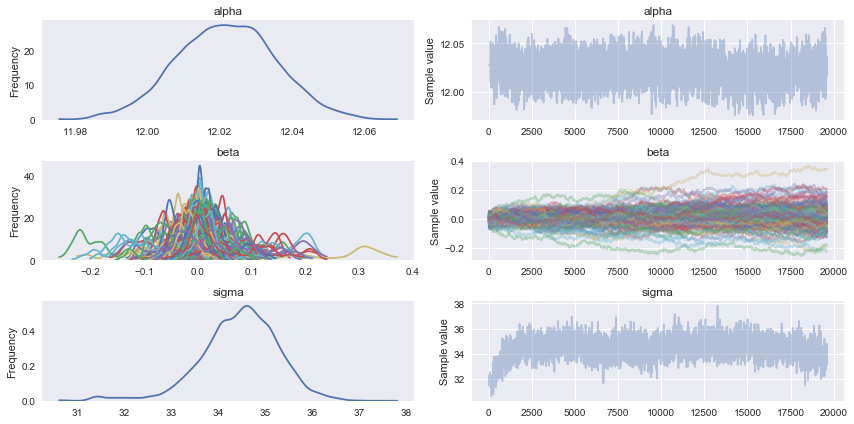

In [152]:
pm.traceplot(trace[400:])

In [153]:
class BayesianLogLogitRegression:
    def __init__(self):
        self.parameter = [] # Regression Coefficient
        self.alpha = None # Intercept
    def fit(self, XX, YY):
        XX = XX.values
        YY = YY.values
        with pm.Model() as reg_model:
            alpha = pm.Normal('alpha', mu = 12.0, sd = 15.0)
            beta = pm.Normal('beta', mu = 0.0, sd = 10.0, shape = XX.shape[1])
            sigma = pm.HalfNormal('sigma', sd=10.0)
            ll = [beta[q]*XX[:,q] for q in range(0, XX.shape[1])]
            mu = alpha + sum(ll)
            
            y_obs = MyLogLogit('y_obs', a=mu, b=sigma, observed=YY)
            step = pm.Metropolis()
            trace = pm.sample(20000, step)
        trace = trace[2500:]
        b=np.array(trace['beta'])
        betaDF = pd.DataFrame(data=b, columns = all_data.columns)
        alpha_parameter = trace[alpha].mean()
        self.alpha = alpha_parameter
        parameters = betaDF.mean().values
        self.parameter = parameters
    def predict(self, XX):
        XX = XX.values
        YY = XX.dot(self.parameter) + self.alpha
        return YY

In [154]:
with pm.Model() as reg_model:
    alpha = pm.Normal('alpha', mu = 12, sd = 3.0)
    beta = pm.Normal('beta', mu = 0.0, sd = 3.0, shape = X.shape[1])
    sigma = pm.HalfNormal('sigma', sd=0.02)
    ll = [beta[q]*X[:,q] for q in range(0, X.shape[1])]
    mu = alpha + sum(ll)
            
    y_obs = pm.Normal('y_obs', mu=mu, sd=sigma, observed=y)
    step = pm.Metropolis()
    trace = pm.sample(20000, step)

100%|██████████| 20000/20000 [02:16<00:00, 147.03it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E055AA7CC0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001E07EBD8748>]], dtype=object)

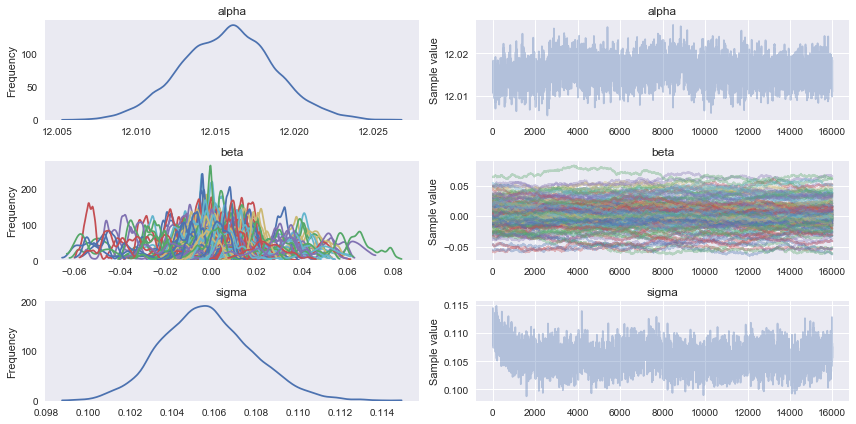

In [155]:
pm.traceplot(trace[4000:])

## Log Normal

In [156]:
with pm.Model() as reg_model:
    alpha = pm.Normal('alpha', mu = 12.0, sd = 3)
    beta = pm.Normal('beta', mu = 0.0, sd = 10.0, shape = X.shape[1])
    sigma = pm.HalfNormal('sigma', sd=10.0)
    ll = [beta[q]*X[:,q] for q in range(0, X.shape[1])]
    mu = alpha + sum(ll)
            
    y_obs = pm.Lognormal('y_obs', mu=mu, sd=sigma, observed=y)
    step = pm.Metropolis()
    trace = pm.sample(20000, step)

100%|██████████| 20000/20000 [02:00<00:00, 166.52it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E008078F98>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001E105C426A0>]], dtype=object)

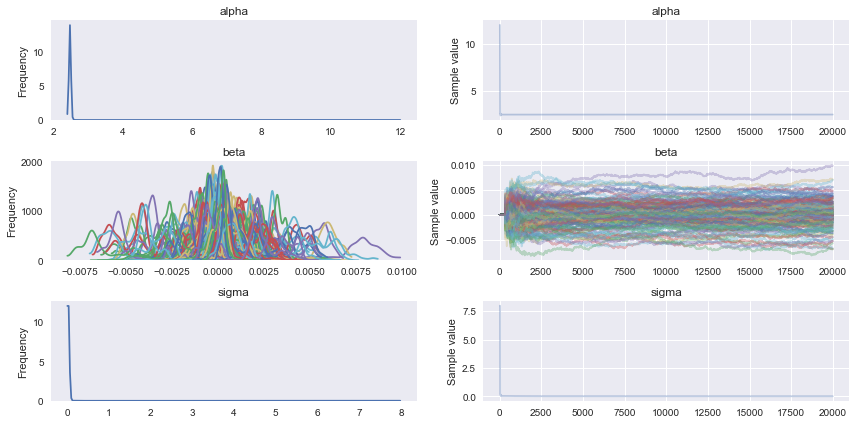

In [157]:
pm.traceplot(trace)

In [158]:
class BayesianLogNormalRegression:
    def __init__(self):
        self.parameter = [] # Regression Coefficient
        self.alpha = None # Intercept
    def fit(self, XX, YY):
        XX = XX.values
        YY = YY.values
        with pm.Model() as reg_model:
            alpha = pm.Normal('alpha', mu = 2, sd = 15.0)
            beta = pm.Normal('beta', mu = 0.0, sd = 10.0, shape = XX.shape[1])
            sigma = pm.HalfNormal('sigma', sd=10.0)
            ll = [beta[q]*XX[:,q] for q in range(0, XX.shape[1])]
            mu = alpha + sum(ll)
            
            y_obs = pm.Lognormal('y_obs', mu=mu, sd=sigma, observed=YY)
            step = pm.Metropolis()
            trace = pm.sample(20000, step)
        trace = trace[2500:]
        b=np.array(trace['beta'])
        betaDF = pd.DataFrame(data=b, columns = all_data.columns)
        alpha_parameter = trace[alpha].mean()
        self.alpha = alpha_parameter
        parameters = betaDF.mean().values
        self.parameter = parameters
    def predict(self, XX):
        XX = XX.values
        YY = XX.dot(self.parameter) + self.alpha
        return YY

In [159]:
cv_score = my_cv(BayesianLogNormalRegression(), X_train, y, 5)    
print ("rmse using my custom log normal distribution is = ", cv_score)

100%|██████████| 20000/20000 [01:32<00:00, 216.14it/s]


rmse using my custom log normal distribution is =  9.54409280468


## Predicting y for new sample

In [9]:
from sklearn.model_selection import train_test_split
Xtr, Xte, Ytr, Yte = train_test_split(X, y, test_size=0.2, random_state=42)
with pm.Model() as reg_model:
    alpha = pm.Normal('alpha', mu = 10, sd = 3.0)
    beta = pm.Laplace('beta', mu = 0.0, b = 3, shape = Xtr.shape[1])
    sigma = pm.HalfNormal('sigma', sd=0.5)
    ll = [beta[q]*Xtr[:,q] for q in range(0, Xtr.shape[1])]
    mu = alpha + sum(ll)
            
    y_obs = pm.Normal('y_obs', mu=mu, sd=sigma, observed=Ytr)
    step = pm.Metropolis()
    trace = pm.sample(20000, step)

100%|██████████| 20000/20000 [01:34<00:00, 210.82it/s]


In [10]:
trace = trace[5000:]
from scipy.stats import norm
currentX = Xte[1]
expectedY = Yte.iloc[0]
mu = np.dot(trace[beta], currentX) + trace['alpha']
y_dist = norm.rvs(mu, trace[sigma])

Plotting the table/Data Frame

In [41]:
data = {'alpha':trace['alpha'],
       'sigma':trace['sigma'],
       'beta1':trace['beta'][:,1],
       'beta2':trace['beta'][:,2],
        'mu':mu,
       'y_new':y_dist}

In [42]:
df = pd.DataFrame(data)

In [43]:
df.head()

,alpha,beta1,beta2,mu,sigma,y_new
0,12.008280,0.006755,0.006779,12.754126,0.116592,12.770938
1,12.008280,0.006755,0.006779,12.754126,0.110223,12.877303
2,12.008280,0.006755,0.006779,12.754126,0.110223,12.772116
3,12.016184,0.006755,0.006779,12.762030,0.110223,12.724660
4,12.016184,0.006755,0.006779,12.762030,0.110223,12.755637


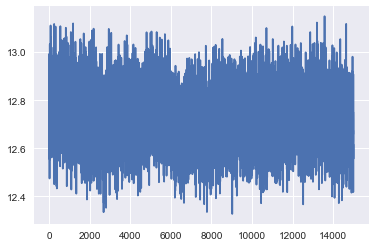

In [162]:
plt.plot(y_dist)

C:\Users\vora\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


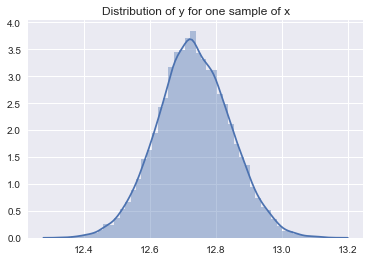

In [163]:
sns.distplot(y_dist)
plt.title("Distribution of y for one sample of x")

Prediction as mean of distribution

In [164]:
np.average(y_dist)

12.732749042405782

Prediction from point estimate

In [165]:
b=np.array(trace['beta'])
betaDF = pd.DataFrame(data=b, columns = all_data.columns)
alpha_parameter = trace[alpha].mean()
alpha = alpha_parameter
parameters = betaDF.mean().values
parameter = parameters

In [166]:
currentX.dot(parameter) + alpha

12.73345302492503

Actual value

In [167]:
Yte.iloc[1]

12.691580461311874

# Distribution of y_pred

In [27]:
class LassoRegressionDistribution:
    def __init__(self):
        self.trace = [] 
    def fit(self, XX, YY):
        XX = XX.values
        YY = YY.values
        with pm.Model() as reg_model:
            alpha = pm.Normal('alpha', mu = 3, sd = 15.0)
            beta = pm.Laplace('beta', mu = 0.0, b = 10.0, shape = XX.shape[1])
            sigma = pm.HalfNormal('sigma', sd=10.0)
            ll = [beta[q]*XX[:,q] for q in range(0, XX.shape[1])]
            mu = alpha + sum(ll)
            y_obs = pm.Normal('y_obs', mu=mu, sd=sigma, observed=YY)
            step = pm.Metropolis()
            trace = pm.sample(20000, step)
        self.trace = trace[2500:]
    def predict(self, XX):
        trace = self.trace
        chain_length = trace['beta'].shape[0]
        y_post_pred = np.zeros((len(XX), chain_length))
        for chain_idx in range(chain_length):
            y_post_pred[:,chain_idx] = norm.rvs(loc = trace['alpha'][chain_idx] + np.dot(trace['beta'][chain_idx], XX.T), 
                                                scale = np.repeat([trace['sigma'][chain_idx]], [len(XX)]))
        YY = np.average(y_post_pred, axis=1)    
        return YY

In [28]:
cv_score = my_cv(LassoRegressionDistribution(), X_train, y, 5)    
print ("rmse using Lasso Regression is = ", cv_score)

100%|██████████| 20000/20000 [01:29<00:00, 222.22it/s]


rmse using Lasso Regression is =  0.252884062672


In [38]:
class RidgeRegressionDistribution:
    def __init__(self):
        self.parameter = [] # Regression Coefficient
        self.alpha = None # Intercept
    def fit(self, XX, YY):
        XX = XX.values
        YY = YY.values
        with pm.Model() as reg_model:
            alpha = pm.Normal('alpha', mu = 2, sd = 15.0)
            beta = pm.Normal('beta', mu = 0.0, sd = 10.0, shape = XX.shape[1])
            sigma = pm.HalfNormal('sigma', sd=10.0)
            ll = [beta[q]*XX[:,q] for q in range(0, XX.shape[1])]
            mu = alpha + sum(ll)
            
            y_obs = pm.Normal('y_obs', mu=mu, sd=sigma, observed=YY)
            step = pm.Metropolis()
            trace = pm.sample(20000, step)
        self.trace = trace[2500:]
    def predict(self, XX):
        trace = self.trace
        chain_length = trace['beta'].shape[0]
        y_post_pred = np.zeros((len(XX), chain_length))
        for chain_idx in range(chain_length):
            y_post_pred[:,chain_idx] = norm.rvs(loc = trace['alpha'][chain_idx] + np.dot(trace['beta'][chain_idx], XX.T), 
                                                scale = np.repeat([trace['sigma'][chain_idx]], [len(XX)]))
        YY = np.average(y_post_pred, axis=1)    
        return YY

In [41]:
cv_score = my_cv(RidgeRegressionDistribution(), X_train, y, 5)    
print ("rmse using Ridge Regression with Distribution is = ", cv_score)

100%|██████████| 20000/20000 [01:34<00:00, 211.25it/s]


rmse using Ridge Regression with Distribution is =  0.330207296097
